To use, simply import the module and read your data file

In [1]:
import xrk
myxrk = xrk.XRK('test.xrk')
myxrk

XRK(datetime=2015-12-23 12:09:04, lapcount=11, vehicle_name=, track_name=Adria Kart, racer_name=A.GIARDELLI, championship_name=)

The `summary()` method returns some text about the data contained in the xrk file

In [2]:
print(myxrk.summary())

Track: Adria Kart
Date: 2015-12-23 12:09:04
Driver: A.GIARDELLI
Vehicle: 
Championship: 
Laps: 11
 0 	 1:22.248
 1 	 0:53.058
 2 	 0:52.217
 3 	 0:50.973
 4 	 0:49.802
 5 	 0:50.742
 6 	 0:49.866
 7 	 0:50.618
*8*	*0:49.765*
 9 	 0:50.316
 10 	 0:58.817



Each XRK has data channels, stored in a `dict` called `.channels`. dict keys are the channel name.

In [3]:
myxrk.channels

{'Logger Temperature': XRKChannel(name='Logger Temperature', idxf=1, idxc=0),
 'Exhaust Temp': XRKChannel(name='Exhaust Temp', idxf=1, idxc=1),
 'Water Temp': XRKChannel(name='Water Temp', idxf=1, idxc=2),
 'AccelerometerX': XRKChannel(name='AccelerometerX', idxf=1, idxc=3),
 'AccelerometerY': XRKChannel(name='AccelerometerY', idxf=1, idxc=4),
 'AccelerometerZ': XRKChannel(name='AccelerometerZ', idxf=1, idxc=5),
 'GyroX': XRKChannel(name='GyroX', idxf=1, idxc=6),
 'GyroY': XRKChannel(name='GyroY', idxf=1, idxc=7),
 'GyroZ': XRKChannel(name='GyroZ', idxf=1, idxc=8),
 'Int Batt Voltage': XRKChannel(name='Int Batt Voltage', idxf=1, idxc=9),
 'RPM': XRKChannel(name='RPM', idxf=1, idxc=10),
 'GPS Speed': XRKGPSChannel(name='GPS Speed', idxf=1, idxc=0),
 'GPS Nsat': XRKGPSChannel(name='GPS Nsat', idxf=1, idxc=1),
 'GPS LatAcc': XRKGPSChannel(name='GPS LatAcc', idxf=1, idxc=2),
 'GPS LonAcc': XRKGPSChannel(name='GPS LonAcc', idxf=1, idxc=3),
 'GPS Slope': XRKGPSChannel(name='GPS Slope', idxf=

Each channel has `.units()` and `.samples()`. Samples returns two lists, one is either time or distance, and one is the data recorded at that point.

In [4]:
myxrk.channels['GPS Speed'].units()

'm/s'

In [5]:
distances, datapoints = myxrk.channels['GPS Speed'].samples()
len(distances), len(datapoints)

(59825, 59825)

If you call `.samples()` with no arguments, you get all the samples in the entire file. That's not super useful, but you can examine things per lap with the `lap` parameter.

In [6]:
speedchan = myxrk.channels['GPS Speed']
distances, datapoints = speedchan.samples(lap=2)
len(distances), len(datapoints)

(5221, 5221)

Once you can access the data, it's useful to visualize it. You can use matplot to quickly visualize inline.

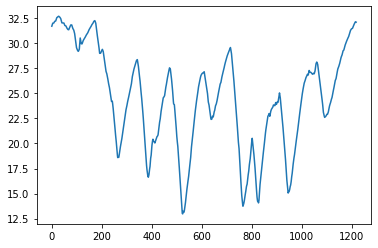

In [7]:
import matplotlib.pyplot as plt
speedchan = myxrk.channels['GPS Speed']
distances, datapoints = speedchan.samples(lap=2)
plt.plot(distances, datapoints)

The speed is a little weird to think of in m/s, so you can convert to km/h by multiplying by 3.6, then plotting that.

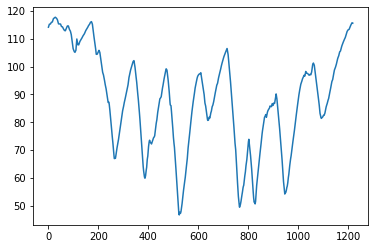

In [8]:
datapoints = [d*3.6 for d in datapoints]
plt.plot(distances, datapoints)

If you wanted to compare the speeds of many laps, it's easy to wrap this in a loop

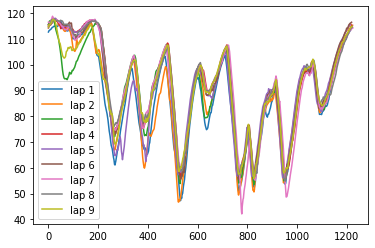

In [9]:
# skipping 0th and last laps
for lap in range(1, myxrk.lapcount-1):
    distances, data = myxrk.channels['GPS Speed'].samples(lap=lap)
    data = [d*3.6 for d in data]
    plt.plot(distances, data, label=f'lap {lap}')
plt.legend()
plt.show()

That's a lot of stuff to sling into one graph. Maybe it's better to look at the fastest lap and the previous one?


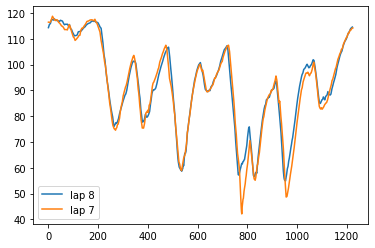

In [10]:
for lap in [myxrk.bestlap, myxrk.bestlap-1]:
    distances, data = myxrk.channels['GPS Speed'].samples(lap=lap)
    data = [d*3.6 for d in data]
    plt.plot(distances, data, label=f'lap {lap}')
plt.legend()
plt.show()

You can also plot points. The friction circle, for example:

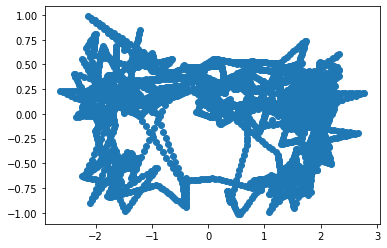

In [11]:
dist, lat = myxrk.channels['GPS LatAcc'].samples(lap=myxrk.bestlap)
dist, lon = myxrk.channels['GPS LonAcc'].samples(lap=myxrk.bestlap)
plt.scatter(lat, lon)

That's the basics. Poke around the code.